In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_Rows',None)
pd.set_option('Display.Width',None)

In [198]:
#load data set 
sales=pd.read_csv('/content/sales-data.csv',encoding='latin1')

In [199]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [200]:
#1. Total Revenue Generated (By Country)
#Total Revenue = Number of Units Sold X Cost Per Unit
# IN Sales Data
#sales=QUANTITYORDERED*PRICEEACH(wchich is given in data set)

In [201]:
#Total Revenue Generated (By Country)
Total_Revenue_country=sales.groupby('COUNTRY')['SALES'].sum()

In [202]:
Total_Revenue_country

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3627982.83
Name: SALES, dtype: float64

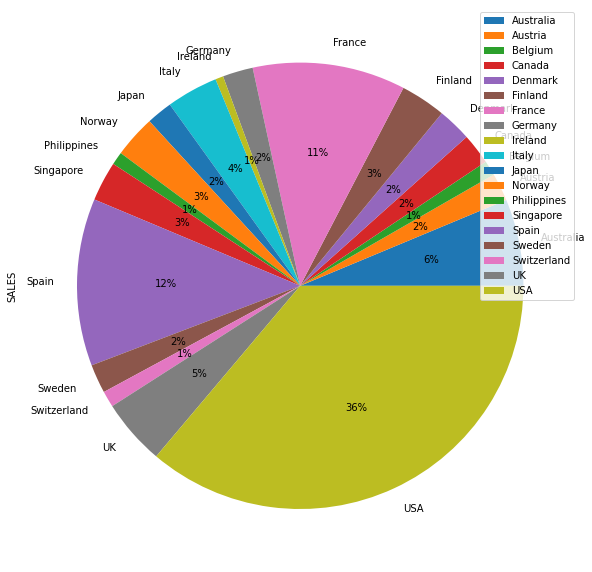

In [203]:
#How much percentage of Total revenue by country by pie plot
sales.groupby(['COUNTRY']).sum().plot(kind='pie', y='SALES',autopct='%1.0f%%',figsize=(10, 20))

In [204]:
#2. Quarterly Revenue Generated (By Country)

In [231]:
#checking Unique Value
sales['YEAR_ID'].unique()

array([2003, 2004, 2005])

In [232]:
#sort Data By Year wise 
sales_2003=sales[sales['YEAR_ID']==2003]
sales_2004=sales[sales['YEAR_ID']==2004]
sales_2005=sales[sales['YEAR_ID']==2005]

In [212]:
#using group by per year by quarterly sales(Revenue)
Quarterly_Revenue_2003=sales_2003.groupby('COUNTRY')['QTR_ID','SALES'].sum()
Quarterly_Revenue_2004=sales_2004.groupby('COUNTRY')['QTR_ID','SALES'].sum()
Quarterly_Revenue_2005=sales_2005.groupby('COUNTRY')['QTR_ID','SALES'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [213]:
Quarterly_Revenue_2003 #Quaterly Revenue for 2003

,QTR_ID,SALES
COUNTRY,,
Australia,248,253134.45
Austria,76,82117.88
Belgium,5,3348.46
Canada,60,54609.50
Denmark,63,99192.72
Finland,109,111154.51
France,262,312761.42
Germany,72,70053.31
Italy,122,140928.77


In [217]:
Quarterly_Revenue_2004 #Quaterly Revenue for 2004

,QTR_ID,SALES
COUNTRY,,
Australia,202,232396.68
Austria,46,51694.39
Belgium,62,80024.05
Canada,128,135776.09
Denmark,112,120431.56
Finland,55,91575.69
France,429,555198.70
Germany,126,150418.78
Ireland,30,57756.43


In [220]:
Quarterly_Revenue_2005 #Quaterly Revenue for 2005

,QTR_ID,SALES
COUNTRY,,
Australia,61,145091.97
Austria,31,68250.26
Belgium,13,25040.11
Canada,18,33692.97
Denmark,6,26012.87
Finland,38,126851.71
France,85,242956.40
Italy,28,41509.94
Japan,11,38745.34


In [179]:
#3. Total Products Sold

In [151]:
#calculate Total Sold By using Sum
sales['QUANTITYORDERED'].sum()

99067

In [ ]:
#4. Total Products Sold (By Product Line)

In [27]:
#using GroupBy calculate Total product sold 
Total_Products_Sold_productline=sales.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()

In [28]:
Total_Products_Sold_productline

PRODUCTLINE
Classic Cars        33992
Motorcycles         11663
Planes              10727
Ships                8127
Trains               2712
Trucks and Buses    10777
Vintage Cars        21069
Name: QUANTITYORDERED, dtype: int64

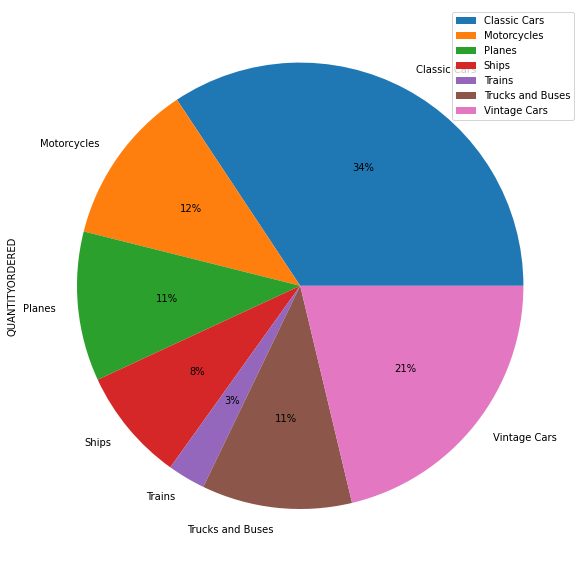

In [29]:
#Using Pie chart to show percentage of Total productline
sales.groupby(['PRODUCTLINE']).sum().plot(kind='pie', y='QUANTITYORDERED',autopct='%1.0f%%',figsize=(10, 20))

In [ ]:
#5.Quarterly Revenue (By Product Line)

In [221]:
# data sort into year wise
sales_2003=sales[sales['YEAR_ID']==2003]
sales_2004=sales[sales['YEAR_ID']==2004]
sales_2005=sales[sales['YEAR_ID']==2005]

In [223]:
sales_2005.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
22,10375,21,34.91,12,733.11,2/3/2005 0:00,Shipped,1,2,2005,Motorcycles,95,S10_1678,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
23,10388,42,76.36,4,3207.12,3/3/2005 0:00,Shipped,1,3,2005,Motorcycles,95,S10_1678,FunGiftIdeas.com,5085552555,1785 First Street,NaN,New Bedford,MA,50553,USA,NaN,Benitez,Violeta,Medium
24,10403,24,100.00,7,2434.56,4/8/2005 0:00,Shipped,2,4,2005,Motorcycles,95,S10_1678,"UK Collectables, Ltd.",(171) 555-2282,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
25,10417,66,100.00,2,7516.08,5/13/2005 0:00,Disputed,2,5,2005,Motorcycles,95,S10_1678,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
49,10369,41,100.00,2,4514.92,1/20/2005 0:00,Shipped,1,1,2005,Classic Cars,214,S10_1949,Collectables For Less Inc.,6175558555,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,NaN,Nelson,Allen,Medium


In [226]:
#using group by total revenue by productline 
Quarterly_Revenue_2003_productline=sales_2003.groupby('PRODUCTLINE')['QTR_ID','SALES'].sum()
Quarterly_Revenue_2004_productline=sales_2004.groupby('PRODUCTLINE')['QTR_ID','SALES'].sum()
Quarterly_Revenue_2005_productline=sales_2005.groupby('PRODUCTLINE')['QTR_ID','SALES'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
Quarterly_Revenue_2003_productline

,QTR_ID,SALES
PRODUCTLINE,,
Classic Cars,1178,1484785.29
Motorcycles,344,370895.58
Planes,246,272257.60
Ships,246,244821.09
Trains,85,72802.29
Trucks and Buses,338,420429.93
Vintage Cars,665,650987.76


In [227]:
Quarterly_Revenue_2004_productline

,QTR_ID,SALES
PRODUCTLINE,,
Classic Cars,1288,1762257.09
Motorcycles,461,560545.23
Planes,470,502671.80
Ships,324,341437.97
Trains,109,116523.85
Trucks and Buses,428,529302.89
Vintage Cars,836,911423.77


In [228]:
Quarterly_Revenue_2005_productline

,QTR_ID,SALES
PRODUCTLINE,,
Classic Cars,218,672573.28
Motorcycles,79,234947.53
Planes,84,200074.17
Ships,49,128178.07
Trains,15,36917.33
Trucks and Buses,71,178057.02
Vintage Cars,138,340739.31


In [ ]:
#6. Total Revenue (By Product Line)

In [153]:
#using Group by calculate sales
Total_Revenue_productline=sales.groupby('PRODUCTLINE')['SALES'].sum()

In [234]:
Total_Revenue_productline #final oupt put

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

In [57]:
#Q2
#load data set 
google=pd.read_csv('/content/Stocks_Google.csv')

In [58]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,GOOGL
1,08-08-2017,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,GOOGL
2,09-08-2017,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,GOOGL
3,10-08-2017,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,GOOGL
4,11-08-2017,45.398499,45.889000,45.278999,45.719501,45.719501,24136000,GOOGL


In [59]:
#1. Print the highest opening and the lowest closing values of each month for Google.

In [66]:
#checking data info 
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
 7   Company    1258 non-null   object 
 8   Day        1258 non-null   object 
 9   Month      1258 non-null   object 
 10  Year       1258 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 108.2+ KB


In [61]:
#date column splite into day,month,year 
google[["Day", "Month","Year" ]] = google["Date"].str.split("-", expand = True)

In [67]:
#chage mount type object to numeric
google['Month'] =  pd.to_numeric(google['Month'])

In [78]:
#by using programming taking unique and high opening wrt month
google_High=pd.DataFrame()
l=google['Month'].unique()

for i in l:
  temp=google[google['Month']==i].copy()
  x=temp['Open'].max()
  temp2=temp.iloc[0].copy()
  temp2=temp2.iloc[0:]
  temp2['High_opening']=x
  google_High=google_High.append(temp2)

In [236]:
#create the new data frame 
google_High_opening=google_High[['Company','Month','High_opening']]

In [237]:
google_High_opening

,Company,Month,High_opening
0,GOOGL,8.0,145.884506
19,GOOGL,9.0,145.949493
39,GOOGL,10.0,147.298996
61,GOOGL,11.0,151.000000
82,GOOGL,12.0,149.100006
102,GOOGL,1.0,145.550507
123,GOOGL,2.0,151.863495
142,GOOGL,3.0,143.160507
163,GOOGL,4.0,143.399506
184,GOOGL,5.0,121.847000


In [81]:
#by using programming taking unique and lowest close value wrt month
google_Low=pd.DataFrame()
l=google['Month'].unique()

for i in l:
  temp=google[google['Month']==i].copy()
  x=temp['Close'].min()
  temp2=temp.iloc[0].copy()
  temp2=temp2.iloc[0:]
  temp2['Low_Close']=x
  google_Low=google_Low.append(temp2)

In [83]:
#create the new data frame 
google_Low_Close=google_Low[['Month','Low_Close']]

In [84]:
google_Low_Close

,Month,Low_Close
0,8.0,45.333000
19,9.0,45.750000
39,10.0,47.584000
61,11.0,50.918999
82,12.0,48.811001
102,1.0,50.803001
123,2.0,50.076000
142,3.0,50.228001
163,4.0,50.323502
184,5.0,51.186001


In [85]:
#2. Find the standard deviation of Volume per year for Netflix.
#load data set 
Netflix=pd.read_csv('/content/Stocks_Netflix.csv')

In [86]:
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,181.000000,182.270004,179.100006,181.330002,181.330002,4609800,NTFLX
1,08-08-2017,181.369995,181.910004,177.449997,178.360001,178.360001,6104000,NTFLX
2,09-08-2017,171.429993,175.960007,170.009995,175.779999,175.779999,9670500,NTFLX
3,10-08-2017,174.029999,174.449997,167.600006,169.139999,169.139999,9693100,NTFLX
4,11-08-2017,169.860001,172.580002,169.000000,171.399994,171.399994,5022300,NTFLX


In [88]:
#splite date column into Day ,month ,year 
Netflix[["Day", "Month","Year" ]] = Netflix["Date"].str.split("-", expand = True)

In [90]:
#change year object to numeric 
Netflix['Year'] =  pd.to_numeric(Netflix['Year'])

In [91]:
#by using programming taking unique of year calculate Standerd Deviation wrt Volume
Netflix_Vol=pd.DataFrame()
l=Netflix['Year'].unique()

for i in l:
  temp=Netflix[Netflix['Year']==i].copy()
  x=temp['Volume'].std()
  temp2=temp.iloc[0].copy()
  temp2=temp2.iloc[0:]
  temp2['SD_Volume']=x
  Netflix_Vol=Netflix_Vol.append(temp2)

In [93]:
#create dataframe 
Netflix_Vol_year=Netflix_Vol[['Company','Year','SD_Volume']]

In [94]:
Netflix_Vol_year

,Company,Year,SD_Volume
0,NTFLX,2017.0,3.458000e+06
102,NTFLX,2018.0,5.671688e+06
353,NTFLX,2019.0,4.656262e+06
605,NTFLX,2020.0,3.973960e+06
858,NTFLX,2021.0,2.829995e+06
1110,NTFLX,2022.0,1.346035e+07


In [118]:
#3. Find the difference between the opening values of Amazon and Apple.
#load data set 
Amazon=pd.read_csv('/content/Stocks_Amazon.csv')
Apple=pd.read_csv('/content/Stocks_Apple.csv')

In [119]:
#create data frame copy
Amazon_1=Amazon.copy()

In [120]:
#cheaking shape
Amazon.shape

(1258, 8)

In [121]:
#cheacking shape 
Apple.shape

(1258, 8)

In [122]:
#list of coulumns names AND Add_perfix [Amazon] 
l=['Am_Date', 'Am_Open', 'Am_High', 'Am_Low', 'Am_Close', 'Am_Adj Close', 'Am_Volume',
       'Am_Company']

In [123]:
#change columns name of Amazon data
Amazon.columns=l

In [124]:
#list of columns AND Add_perfix [Apple]
l1=['App_Date', 'App_Open', 'App_High', 'App_Low', 'App_Close', 'App_Adj Close', 'App_Volume',
       'App_Company']

In [125]:
#changing columns names of Apple data set
Apple.columns=l1

In [126]:
#both data set has same shape so using Join command join tha data set
Amz_App=Amazon.join(Apple)

In [127]:
Amz_App.head()

,Am_Date,Am_Open,Am_High,Am_Low,Am_Close,Am_Adj Close,Am_Volume,Am_Company,App_Date,App_Open,App_High,App_Low,App_Close,App_Adj Close,App_Volume,App_Company
0,07-08-2017,49.532501,49.750000,49.356998,49.613499,49.613499,53532000,AMZN,07-08-2017,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
1,08-08-2017,49.717499,49.813999,49.289501,49.492001,49.492001,58056000,AMZN,08-08-2017,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL
2,09-08-2017,49.130001,49.400002,48.763500,49.100498,49.100498,71394000,AMZN,09-08-2017,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL
3,10-08-2017,48.814999,48.993000,47.734001,47.846001,47.846001,113682000,AMZN,10-08-2017,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL
4,11-08-2017,48.000000,48.519501,47.569000,48.399502,48.399502,69360000,AMZN,11-08-2017,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL


In [129]:
##Find the difference between the opening values of Amazon and Apple.
Diff_Amz_App_opening=(Amz_App['Am_Open'])-(Amz_App['App_Open'])

In [130]:
Diff_Amz_App_opening

0       10.267502
1       10.067497
2        9.315002
3        8.840001
4        8.849998
5        9.090500
6        9.279999
7        8.597499
8        8.761997
9        8.605000
10       8.503502
11       8.218502
12       8.201500
13       7.763500
14       7.887501
15       7.292000
16       6.974998
17       6.972000
18       7.825001
19       8.009998
20       7.832500
21       7.738498
22       8.177502
23       8.740002
24       8.598000
25       8.511002
26       9.231003
27      10.092499
28      10.033001
29       9.492500
30       8.985000
31       9.114502
32       9.615497
33      10.165501
34       9.967999
35       9.329502
36       8.950001
37       9.120499
38       9.702999
39       9.635002
40       9.397503
41       9.302998
42       9.955002
43      10.039501
44      10.709500
45      10.818501
46      10.570999
47      10.752998
48      11.167499
49      10.947003
50      10.334499
51      10.358501
52      10.312500
53      10.523998
54      10.113998
55       9

In [131]:
#4. Find the largest daily return for Amazon. (Daily return is calculated by subtracting the opening price from the closing price)

In [133]:
Amazon_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,49.532501,49.750000,49.356998,49.613499,49.613499,53532000,AMZN
1,08-08-2017,49.717499,49.813999,49.289501,49.492001,49.492001,58056000,AMZN
2,09-08-2017,49.130001,49.400002,48.763500,49.100498,49.100498,71394000,AMZN
3,10-08-2017,48.814999,48.993000,47.734001,47.846001,47.846001,113682000,AMZN
4,11-08-2017,48.000000,48.519501,47.569000,48.399502,48.399502,69360000,AMZN


In [134]:
#(Daily return is calculated by subtracting the opening price from the closing price)
Amazon_1_Daily_Return=Amazon_1['Open']-Amazon_1['Close']

In [135]:
Amazon_1_Daily_Return

0       -0.080998
1        0.225498
2        0.029503
3        0.968998
4       -0.399502
5       -0.244499
6        0.307999
7        0.173500
8        0.863498
9        0.146500
10       0.214001
11      -0.569000
12       0.069000
13       0.248497
14       0.536999
15       0.026001
16      -0.702999
17      -0.457500
18      -0.294998
19       0.297501
20       0.506500
21       0.026001
22      -0.273498
23       0.660004
24      -0.174999
25       0.034500
26      -0.781498
27       0.229500
28       0.311001
29       0.810501
30       0.369499
31      -0.071000
32       0.333000
33       0.295498
34       0.476002
35       0.344502
36      -0.143497
37      -0.227001
38      -0.062000
39       0.240502
40       0.045002
41      -0.562000
42      -0.542500
43      -0.696999
44       0.112499
45       0.473499
46      -0.186501
47      -0.206001
48       0.202999
49       0.105000
50      -0.177002
51       0.613503
52       0.169498
53       0.530998
54       1.021499
55      -0

In [ ]:
#5. Print the company name with the highest opening value for each day.

In [140]:
#the copy of data frame here call  and splite date column into Day ,month,year
Amazon_1[["Day", "Month","Year" ]] = Amazon_1["Date"].str.split("-", expand = True)

In [141]:
#
Amazon_1['Day'] =  pd.to_numeric(Amazon_1['Day'])

In [142]:
#using programming company name with the highest opening value for each day.
Amazon_1_High=pd.DataFrame()
l=Amazon_1['Day'].unique()

for i in l:
  temp=Amazon_1[Amazon_1['Day']==i].copy()
  x=temp['Open'].max()
  temp2=temp.iloc[0].copy()
  temp2=temp2.iloc[0:]
  temp2['HighCompany']=x
  Amazon_1_High=Amazon_1_High.append(temp2)

In [146]:
#final outPut
 Amazon_1_High[['Company','Day','HighCompany']]

,Company,Day,HighCompany
0,AMZN,7.0,185.869003
1,AMZN,8.0,182.177994
2,AMZN,9.0,186.126007
3,AMZN,10.0,178.193497
4,AMZN,11.0,175.649994
5,AMZN,14.0,185.442505
6,AMZN,15.0,184.710007
7,AMZN,16.0,181.665497
8,AMZN,17.0,178.235992
9,AMZN,18.0,178.317505
